In [40]:
#importing library
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#assigning the model to a variable
df_2c=pd.read_csv('../input/biomechanical-features-of-orthopedic-patients/column_2C_weka.csv')
df_3c=pd.read_csv('../input/biomechanical-features-of-orthopedic-patients/column_3C_weka.csv')

In [4]:
#loading the data


In [5]:
#getting information about the data
df_2c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [6]:
df_3c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [7]:
#Preprocessing
y_2c=df_2c['class'].copy()
y_3c=df_3c['class'].copy()
x=df_2c.drop('class',axis=1).copy()


In [8]:
y_3c.unique()

array(['Hernia', 'Spondylolisthesis', 'Normal'], dtype=object)

In [9]:
scaler=StandardScaler()
x-scaler.fit_transform(x)
x

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501
...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750


In [10]:
x

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501
...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750


In [11]:
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [12]:
x=pd.DataFrame(x)

In [13]:
x

,0,1,2,3,4,5
0,0.147086,0.501369,-0.665177,-0.184950,-1.447647,-0.708059
1,-1.245864,-0.748769,-1.453001,-1.041521,-0.264385,-0.579556
2,0.484370,0.467932,-0.099262,0.273083,-0.897686,-0.795421
3,0.511390,0.711562,-0.411339,0.126128,-1.207303,-0.402288
4,-0.626648,-0.789693,-1.274745,-0.215876,-0.733455,-0.490106
...,...,...,...,...,...,...
305,-0.731786,-0.392921,-0.860010,-0.646718,-0.035469,-0.814491
306,-0.381197,0.318116,-1.225991,-0.726682,-0.267362,-0.712503
307,0.055201,0.515618,-0.310977,-0.313564,0.582893,-0.773488
308,-0.885823,-0.885660,-0.558613,-0.477128,0.047021,-0.695548


In [14]:
x_train,x_test,y_2c_train,y_2c_test,y_3c_train,y_3c_test=train_test_split(x,y_2c,y_3c,train_size=0.7,random_state=123)

In [15]:
print(x_train.shape)
print(x_test.shape)
print(y_2c_train.shape)
print(y_3c_test.shape)

(217, 6)
(93, 6)
(217,)
(93,)


In [16]:
#training the model
model_2c=LogisticRegression()
model_2c.fit(x_train,y_2c_train)
model_3c=LogisticRegression()
model_3c.fit(x_train,y_3c_train)

LogisticRegression()

In [17]:
y_3c

0      Hernia
1      Hernia
2      Hernia
3      Hernia
4      Hernia
        ...  
305    Normal
306    Normal
307    Normal
308    Normal
309    Normal
Name: class, Length: 310, dtype: object

In [18]:
model_2c.score(x_test,y_2c_test)

0.8387096774193549

In [37]:
acc_2c=model_3c.score(x_test,y_3c_test)

# Create confusion matrics and classification reports

In [21]:
y_2c_true=np.array(y_2c_test)
y_2c_pred=model_2c.predict(x_test)
y_3c_true=np.array(y_3c_test)
y_3c_pred=model_3c.predict(x_test)

In [22]:
#Createt confusion matrics and classification report
cm_2c=confusion_matrix(y_2c_true,y_2c_pred)
cm_3c=confusion_matrix(y_3c_true,y_3c_pred)

In [25]:
cm_3c

array([[11,  9,  1],
       [ 4, 24,  0],
       [ 1,  0, 43]])

In [29]:
y_3c_pred

array(['Hernia', 'Hernia', 'Normal', 'Normal', 'Normal',
       'Spondylolisthesis', 'Normal', 'Spondylolisthesis', 'Normal',
       'Hernia', 'Normal', 'Spondylolisthesis', 'Normal',
       'Spondylolisthesis', 'Spondylolisthesis', 'Spondylolisthesis',
       'Hernia', 'Hernia', 'Spondylolisthesis', 'Spondylolisthesis',
       'Spondylolisthesis', 'Spondylolisthesis', 'Normal', 'Normal',
       'Spondylolisthesis', 'Normal', 'Hernia', 'Spondylolisthesis',
       'Spondylolisthesis', 'Hernia', 'Spondylolisthesis',
       'Spondylolisthesis', 'Spondylolisthesis', 'Normal', 'Hernia',
       'Normal', 'Normal', 'Spondylolisthesis', 'Normal',
       'Spondylolisthesis', 'Spondylolisthesis', 'Normal', 'Normal',
       'Normal', 'Normal', 'Spondylolisthesis', 'Normal', 'Normal',
       'Spondylolisthesis', 'Spondylolisthesis', 'Hernia', 'Hernia',
       'Spondylolisthesis', 'Spondylolisthesis', 'Spondylolisthesis',
       'Normal', 'Normal', 'Spondylolisthesis', 'Hernia',
       'Spondylolis

In [35]:
clr_2c=classification_report(y_2c_true,y_2c_pred)
clr_3c=classificaion_report(y_3c_true,y_3c_pred)


NameError: name 'classificaion_report' is not defined

In [36]:
clr_2c=classification_report(y_2c_true,y_2c_pred)
clr_3c=classification_report(y_3c_true,y_3c_pred)

In [38]:
print('2-Class Accuracy:{:.4f}'.format(acc_2c))

2-Class Accuracy:0.8387


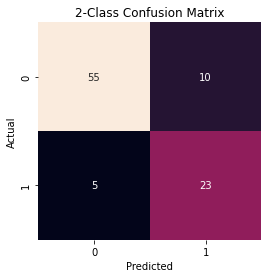

In [41]:
plt.figure(figsize=(4,4))
sns.heatmap(cm_2c,annot=True,fmt='g',cbar=False)
plt.xticks(np.arange(2)+0.5)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('2-Class Confusion Matrix')
plt.show()

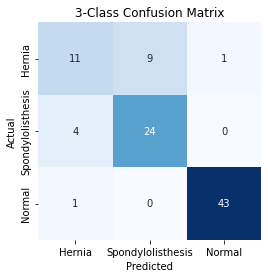

In [49]:
plt.figure(figsize=(4,4))
sns.heatmap(cm_3c,annot=True,fmt='g',cbar=False,vmin=0,cmap='Blues')
plt.xticks(np.arange(3)+0.5,['Hernia','Spondylolisthesis','Normal'])
plt.yticks(np.arange(3)+0.5,['Hernia','Spondylolisthesis','Normal'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('3-Class Confusion Matrix')
plt.show()

In [43]:
cm_3c

array([[11,  9,  1],
       [ 4, 24,  0],
       [ 1,  0, 43]])

In [52]:
print(clr_2c)

              precision    recall  f1-score   support

    Abnormal       0.92      0.85      0.88        65
      Normal       0.70      0.82      0.75        28

    accuracy                           0.84        93
   macro avg       0.81      0.83      0.82        93
weighted avg       0.85      0.84      0.84        93

